<a href="https://colab.research.google.com/github/ManavFCB/UML_proj/blob/master/UML_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(rc={'figure.figsize':(20,12)})
import numpy as np
import pandas as pd
#from tsne import bh_sne
from sklearn.preprocessing import LabelEncoder,normalize
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

In [0]:
"""
colab specific
"""
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
"""
colab specific
"""
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
"""
colab specific
"""
downloaded = drive.CreateFile({'id':"1yIA6JJM6SGDwYSwYaEtQT7GBPcUaIJcw"})
downloaded.GetContentFile('loan.csv') 

In [0]:
loan = pd.read_csv('loan.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,...,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,2.260639e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,...,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,3.068792e-01,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.446293e+03,4.445295e+03,1.182403e+04,1.180594e+04,9.300142e+03,2.386352e+03,1.462469e+00,1.360740e+02,2.259328e+01,3.364015e+03,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,...,5.629468e+00,4.774183e+00,7.726402e+00,8.413439e+00,8.246523e+00,1.400463e+01,5.577951e+00,1.162813e+01,6.373958e-04,2.813652e-03,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04,3.361728e+04,0.633256,1.538997,11.469455,58.169101,3.010554,12.533072,0.046352,0.077568,36.937928,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,8.672303e-01,8.859632e-01,2.190047e+01,26.464094,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,7.547612e+03,7.546657e+03,9.889599e+03,9.884835e+03,8.304886e+03,2.663086e+03,1.150210e+01,7.258317e+02,1.271114e+02,5.971757e+03,1.508131e-01,21.533121,0.0,7.416135e+04,7.822086,6.961656e-02,8.518462e+03,1.606926e+05,1.140700e+00,3.000784e+00,9.256354e-01,...,3.382874e+00,3.037921e+00,4.701430e+00,7.359114e+00,4.683928e+00,8.038868e+00,3.293434e+00,5.644027e+00,2.710643e-02,5.616522e-02,4.935732e-01,1.830711e+00,9.036140e+00,3.621616e+01,3.646130e-01,3.775338e-01,1.815748e+05,4.991124e+04,2.300656e+04,4.5072

**Data Transformation**

In [0]:
loan.drop(['id', 'member_id', 'url', 'zip_code' ,'title','verification_status','funded_amnt_inv'], axis=1, inplace=True) #not needed
loan.head(8)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,pymnt_plan,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,2500,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Dec-2018,Current,n,NaN,debt_consolidation,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,...,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,30000,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Dec-2018,Current,n,NaN,debt_consolidation,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,...,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Dec-2018,Current,n,NaN,debt_consolidation,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,Feb-2019,180.69,...,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,4000,4000,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Dec-2018,Current,n,NaN,debt_consolidation,WA,16.74,0.0,Feb-2006,0.0,NaN,NaN,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,168.07,118.64,0.0,0.0,0.0,Feb-2019,146.51,...,0.0,0.0,385183.0,36151.0,5000.0,44984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,30000,30000,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Dec-2018,Current,n,NaN,debt_consolidation,MD,26.35,0.0,Dec-2000,0.0,NaN,NaN,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,660.98,762.23,0.0,0.0,0.0,Feb-2019,731.78,...,0.0,0.0,157548.0,29674.0,9300.0,32332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,5550,5550,36 months,15.02,192.45,C,C3,Director COE,10+ years,MORTGAGE,152500.0,Dec-2018,Current,n,NaN,credit_card,IN,37.94,0.0,Sep-2002,3.0,NaN,NaN,18.0,0.0,53854,48.1,44.0,w,5302.50,5302.50,377.95,377.95,247.50,130.45,0.0,0.0,0.0,Feb-2019,192.45,...,0.0,0.0,831687.0,185378.0,65900.0,203159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,2000,36 months,17.97,72.28,D,D1,Account Manager,4 years,RENT,51000.0,Dec-2018,Current

In [0]:
dict_={'< 1 year':1,'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10 years':10,'10+ years':10}
def emp_length_map(s):
    if s in dict_.keys():
        return int(dict_[s])
    
def status_encode(i):
    if i=='Fully Paid':
        return 0
    elif i=='Charged Off':
        return 1
    else:
        return 2

In [0]:
loan=loan[loan['annual_inc']<=1000000]
loan=loan[loan['open_acc']<25]

**Pre-processing**

In [0]:
loan['mths_since_last_delinq'].fillna(0,inplace=True)
loan['mths_since_recent_revol_delinq'].fillna(0,inplace=True)
loan['mths_since_last_record'].fillna(0,inplace=True)
loan['mths_since_last_major_derog'].fillna(0,inplace=True)
loan=loan.loc[loan['home_ownership'].isin(['MORTGAGE','OWN','RENT'])] #consider only observations with mortgage,rent,or,ownership
loan['emp_length']=loan['emp_length'].apply(emp_length_map)
loan['loan_status']=loan['loan_status'].apply(status_encode)
loan=loan[loan['loan_status']!=2]
print(loan['loan_status'].value_counts())

0    1014429
1     253131
Name: loan_status, dtype: int64


**EDA**

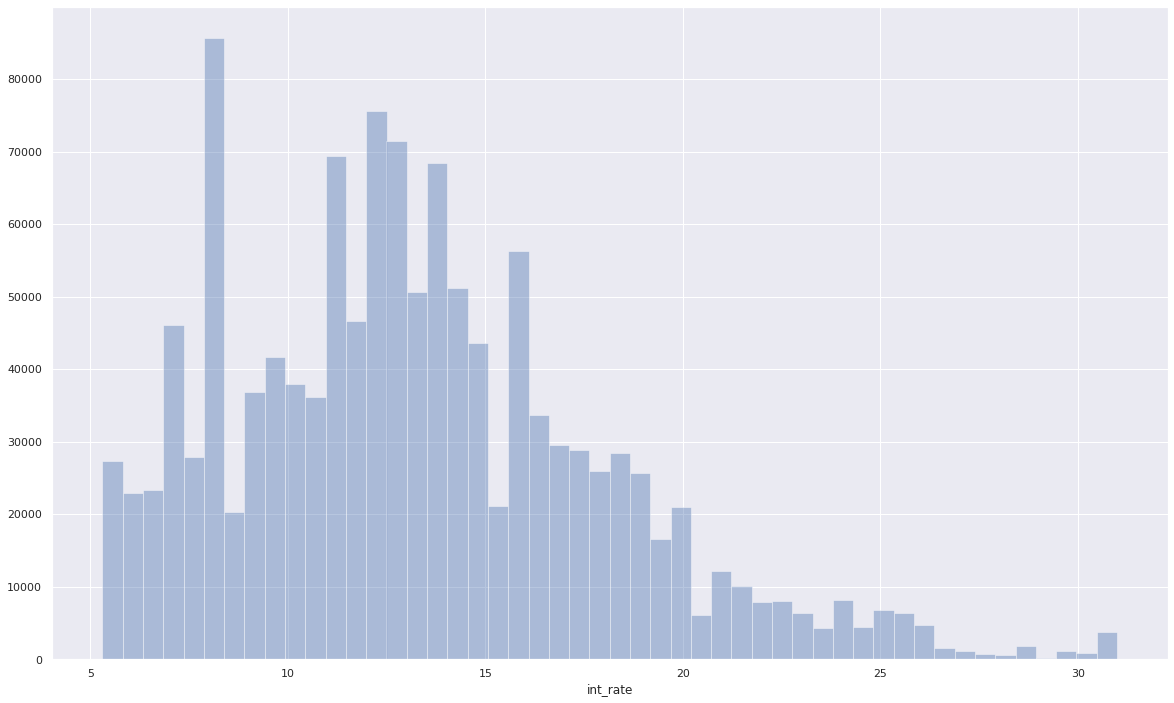

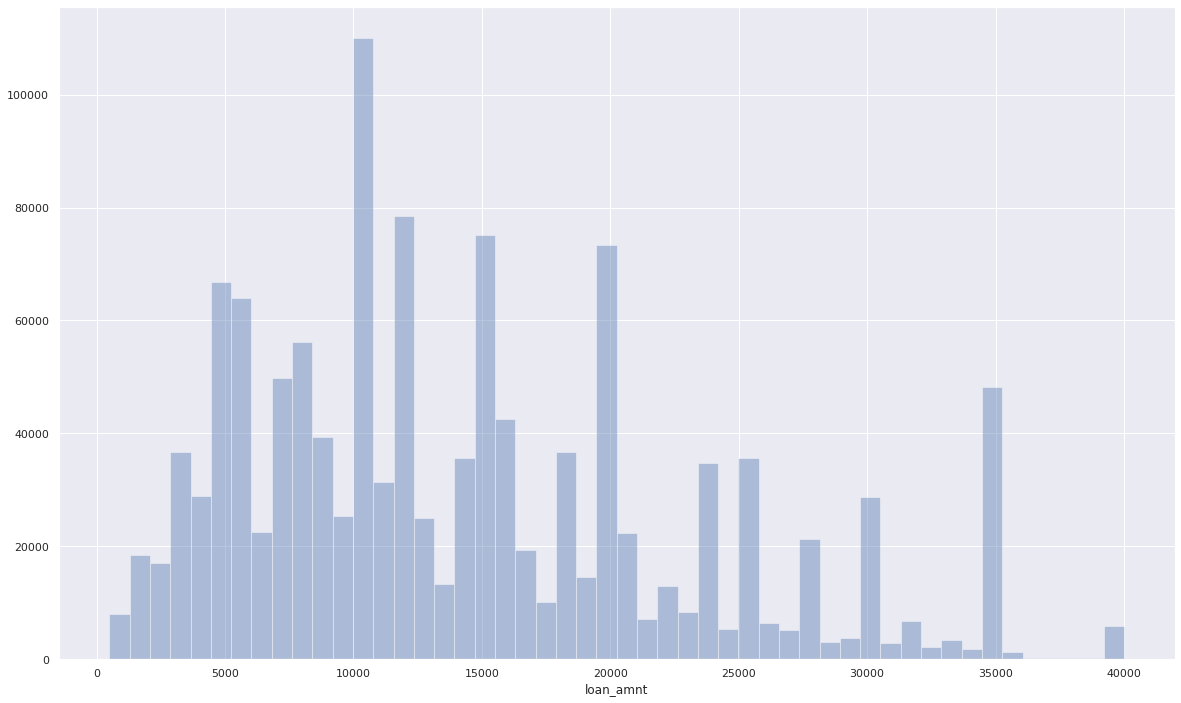

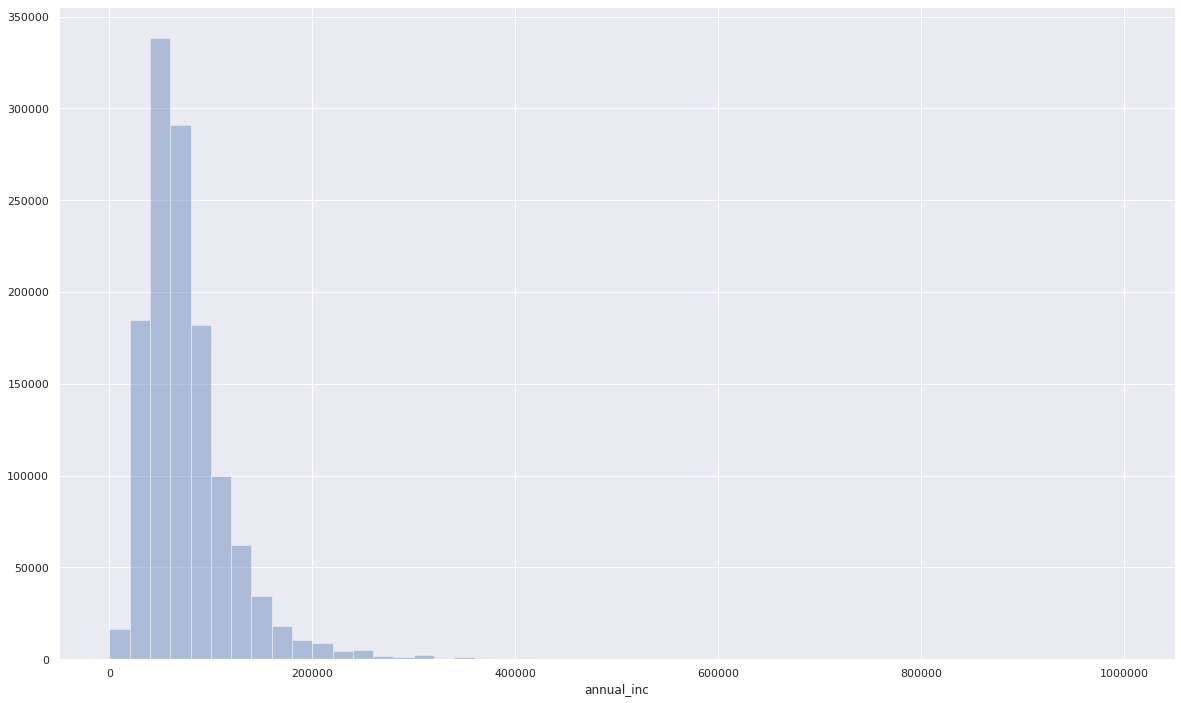

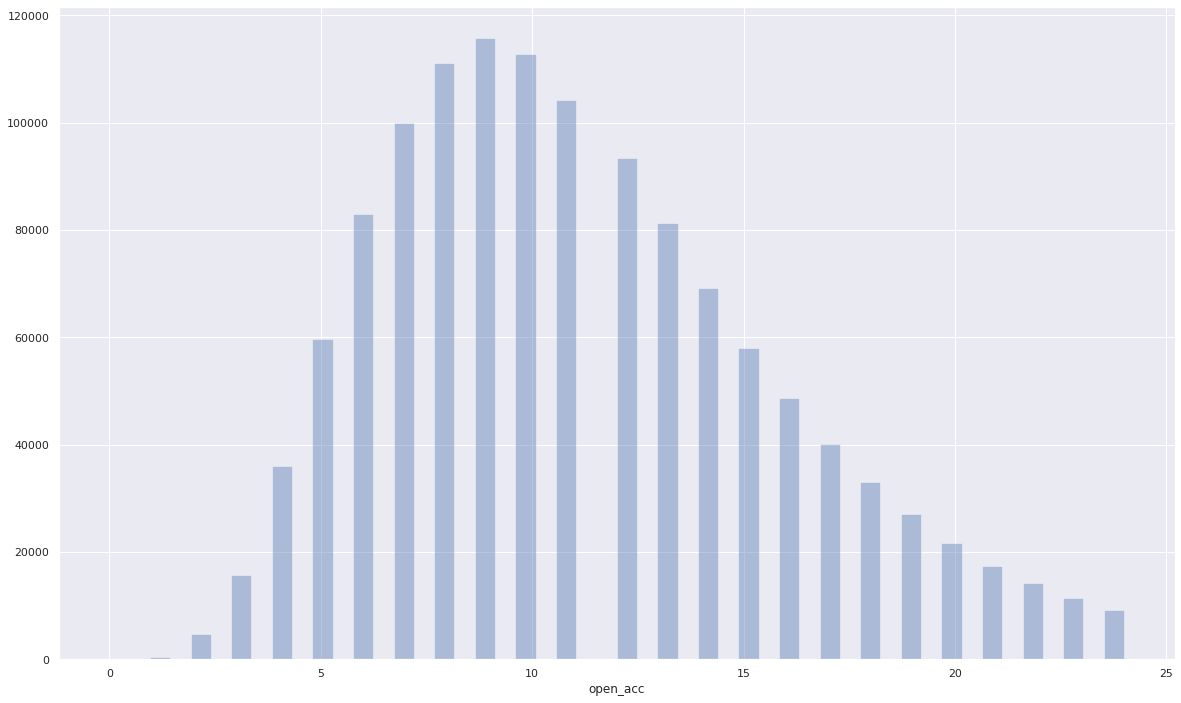

In [0]:
plt.figure()
sns.distplot(loan['int_rate'],kde=False)
plt.figure()
sns.distplot(loan['loan_amnt'],kde=False)
plt.figure()
sns.distplot(loan['annual_inc'],kde=False)
plt.figure()
sns.distplot(loan['open_acc'],kde=False)

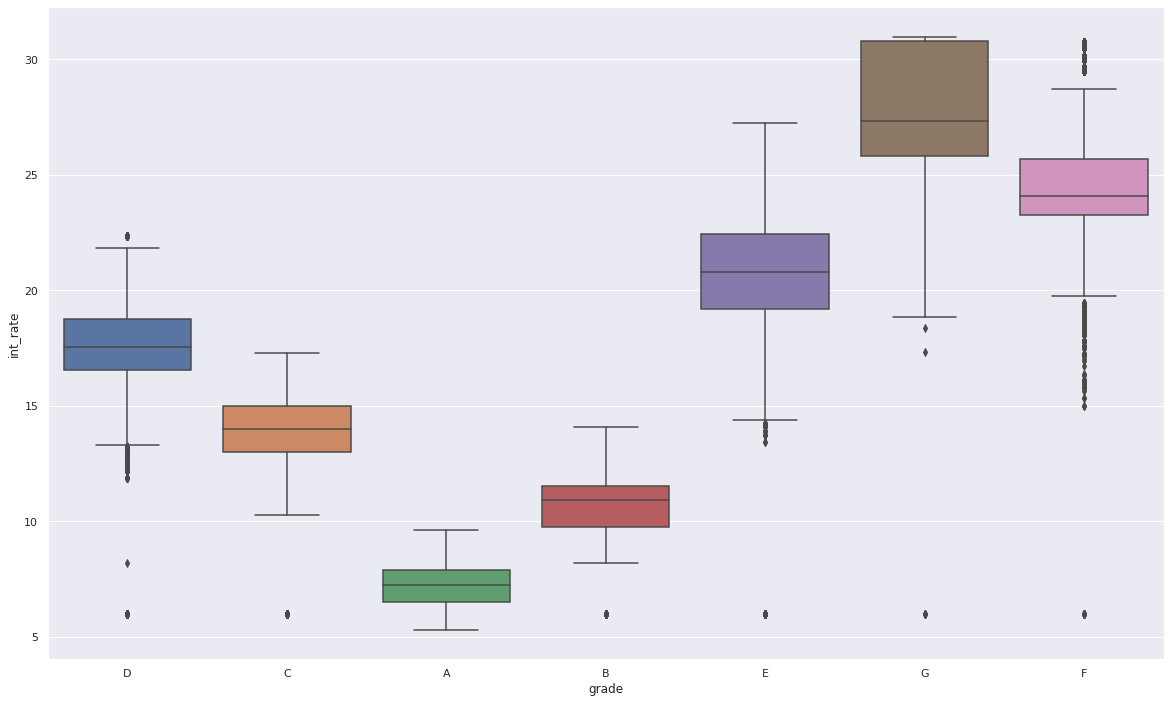

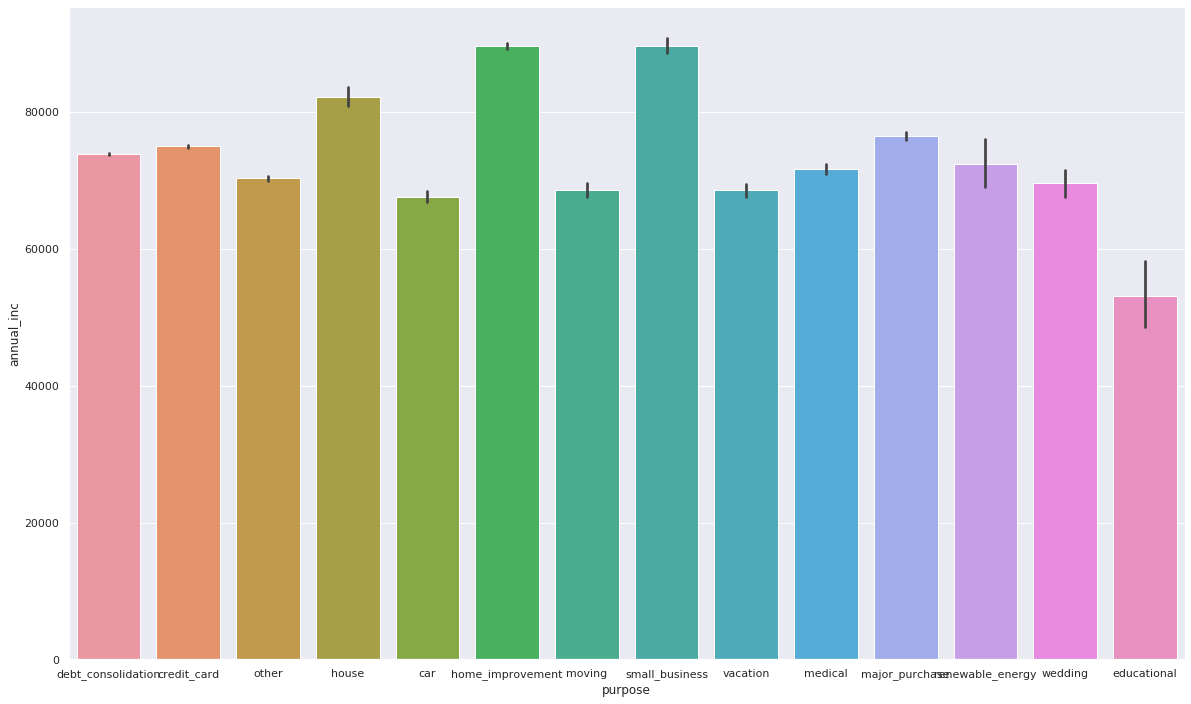

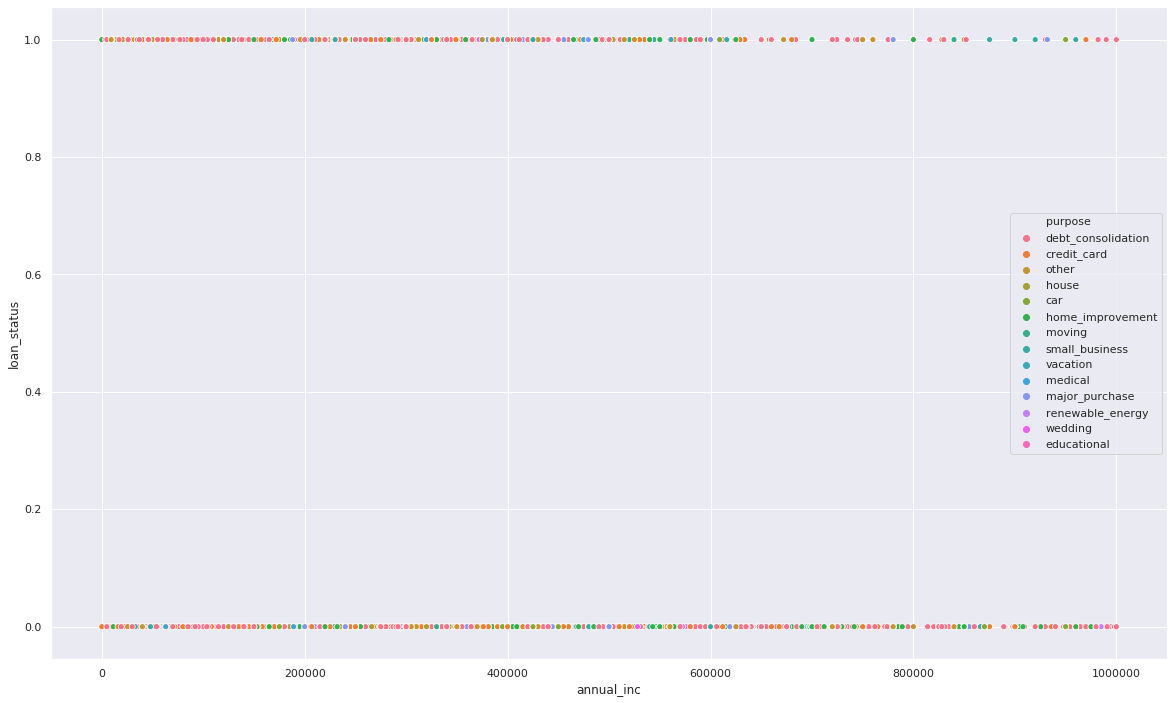

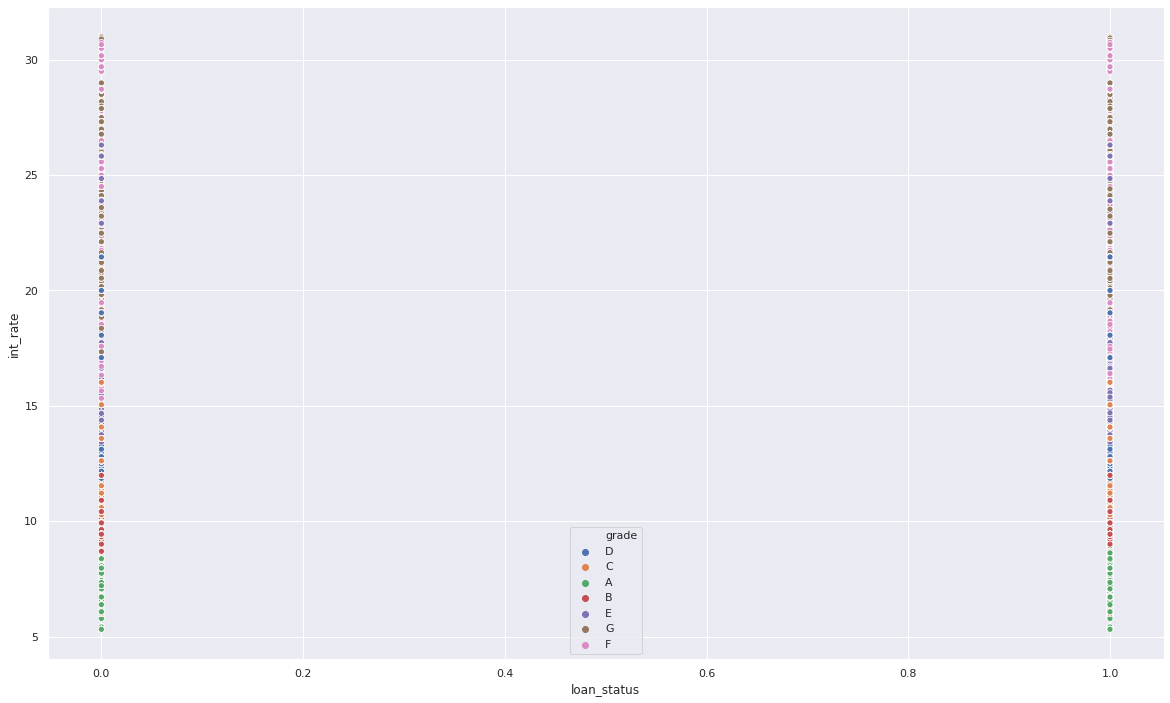

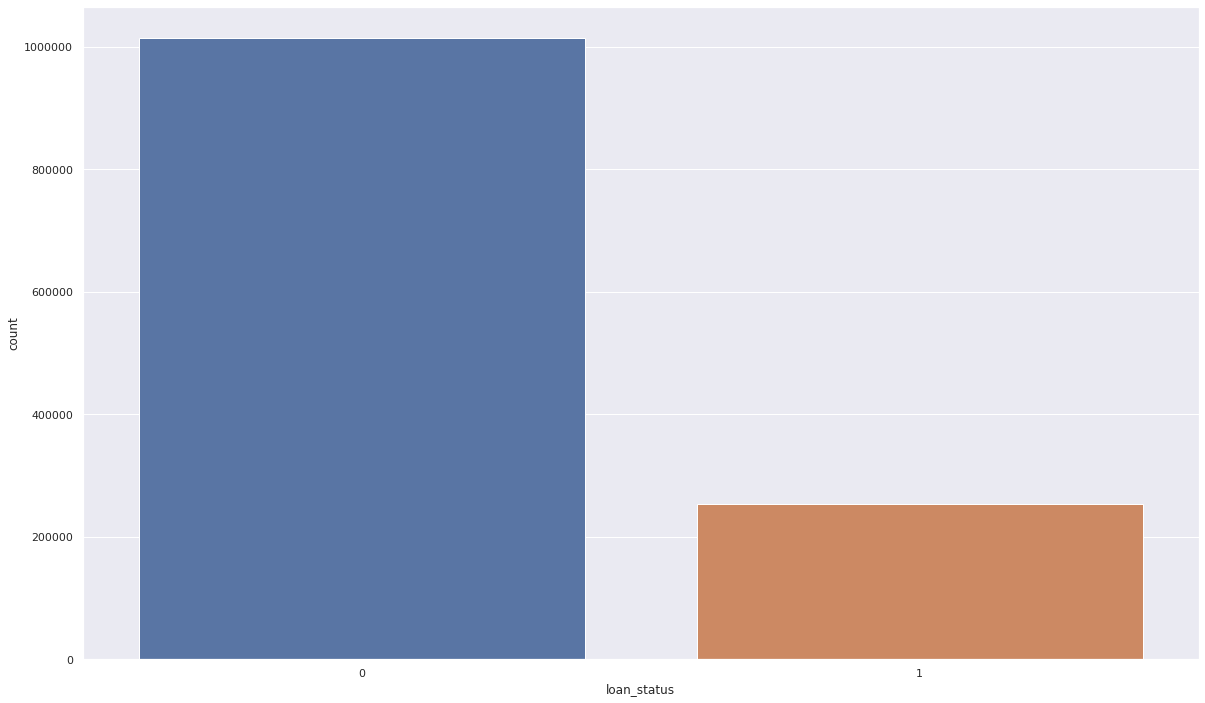

In [0]:
sns.boxplot(x='grade',y='int_rate',data=loan) #v.imp, keep grade and probably remove sub_grade (grade looks significant)
plt.figure()
sns.barplot(x=loan['purpose'],y=loan['annual_inc']) #could be useful
plt.figure()
sns.scatterplot(x=loan['annual_inc'],y=loan['loan_status'],hue=loan['purpose'])
plt.figure()
sns.scatterplot(x=loan['loan_status'],y=loan['int_rate'],hue=loan['grade'])
plt.figure()
sns.countplot(x='loan_status',data=loan)

In [0]:
loan=loan[loan['purpose']!='wedding'] #less important
loan=loan[loan['purpose']!='vacation'] #same here

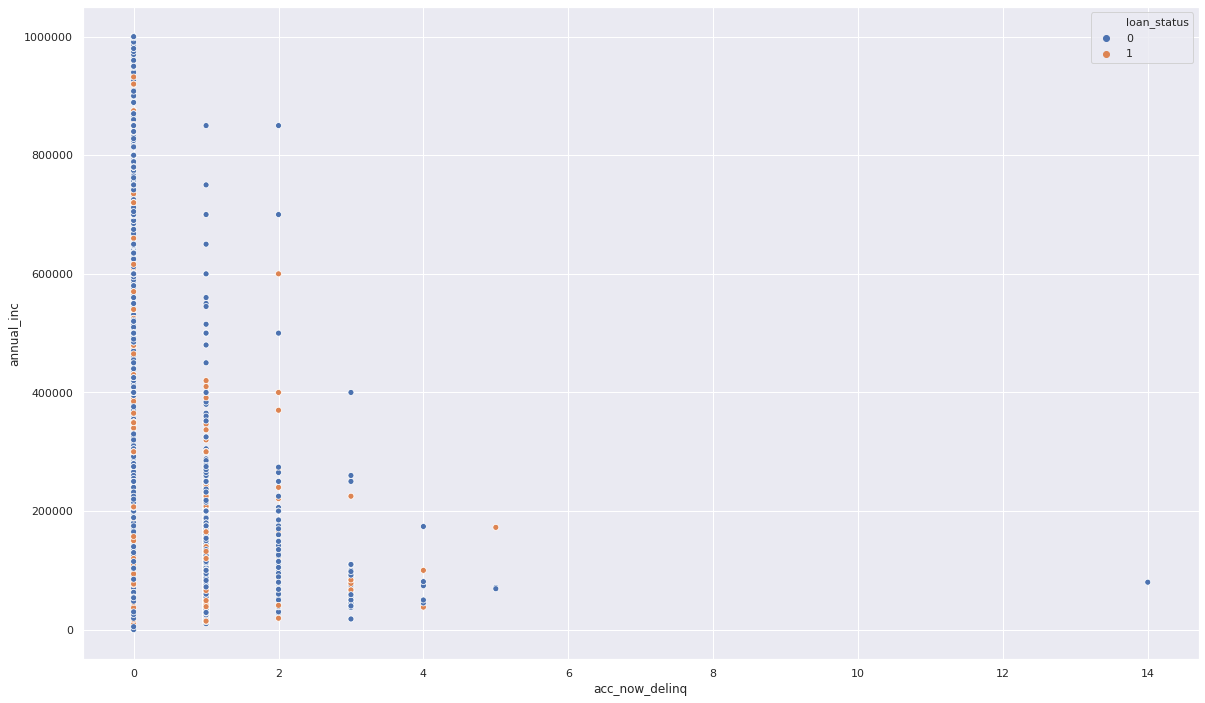

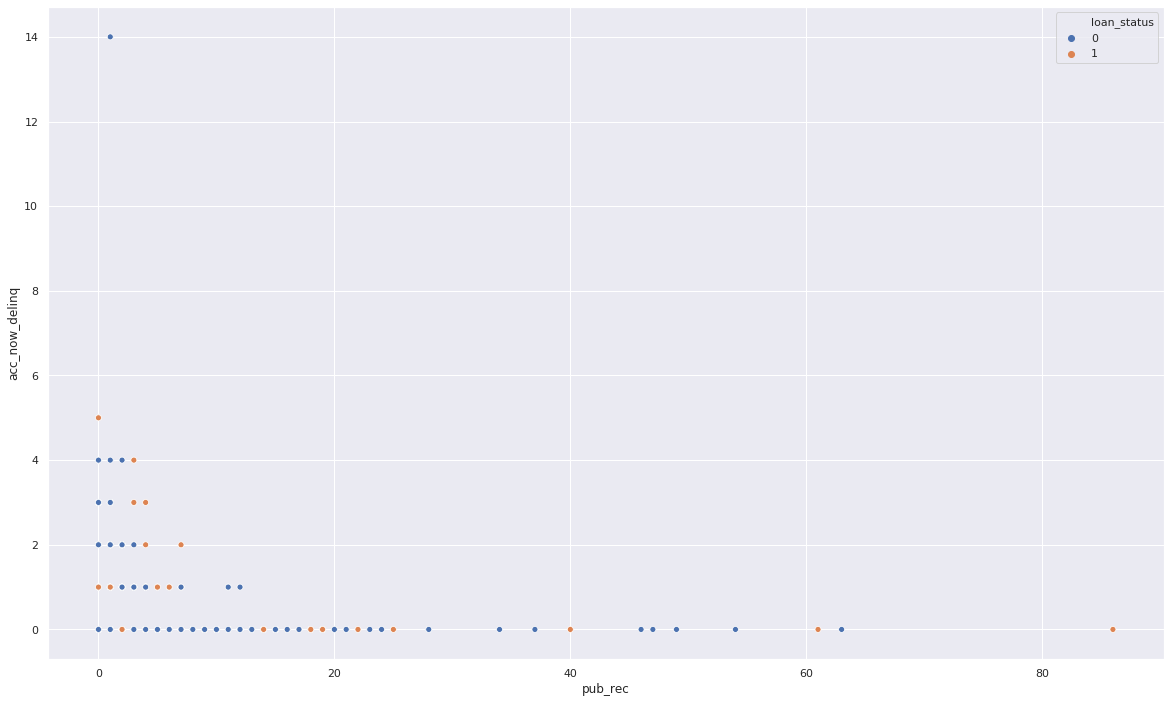

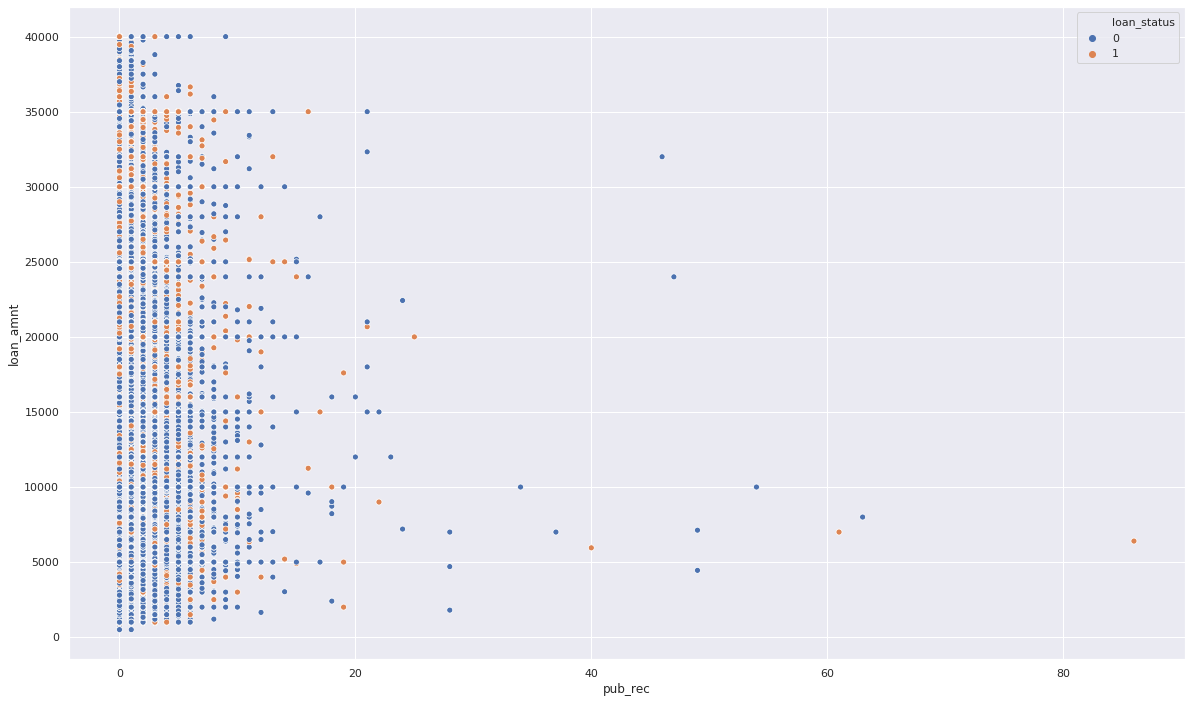

In [0]:
plt.figure()
sns.scatterplot(x=loan['acc_now_delinq'],y=loan['annual_inc'],hue=loan['loan_status'])
plt.figure()
sns.scatterplot(x=loan['pub_rec'],y=loan['acc_now_delinq'],hue=loan['loan_status'])
plt.figure()
sns.scatterplot(x=loan['pub_rec'],y=loan['loan_amnt'],hue=loan['loan_status'])
plt.figure()
sns.scatterplot(x=loan['loan_amnt'],y=loan['acc_now_delinq'],hue=loan['loan_status'])
plt.figure()
sns.scatterplot(x=loan['mths_since_last_delinq'],y=loan['pub_rec'],hue=loan['loan_status'])

In [0]:
plt.figure()
print(np.corrcoef(loan['delinq_2yrs'],loan['annual_inc']))
sns.scatterplot(x='emp_length',y='annual_inc',data=loan)#clear inverse trend expected as the more affluent you are, the less likely you are to become delinquent
plt.figure()
#sns.scatterplot(loan['tot_cur_bal'],loan['mths_since_last_major_derog'],hue='loan_status',data=loan)

In [0]:
plt.figure()
sns.scatterplot(y='dti',x='annual_inc',data=loan,hue='loan_status') #makes sense, having a high income could mean lower possibility of debts
np.corrcoef(loan.dti,loan.annual_inc)
plt.figure()
sns.scatterplot(y='int_rate',x='annual_inc',data=loan,hue='loan_status')
plt.figure()
sns.boxplot(y='dti',x='home_ownership',data=loan)
plt.figure()
sns.boxplot(y='loan_amnt',x='term',data=loan)
plt.figure()
#sns.scatterplot(y='mths_since_last_record',x='mths_since_last_delinq',data=loan)
plt.figure()
sns.boxplot(y='int_rate',x='term',data=loan)

In [0]:
plt.figure()
sns.scatterplot(x='dti',y='mths_since_last_record',hue='loan_status',data=loan)
plt.figure()
sns.scatterplot(x='emp_length',y='loan_status',data=loan)
plt.figure()
sns.scatterplot(x='inq_last_6mths',y='mths_since_last_delinq',data=loan)

In [0]:
sns.scatterplot(x='tot_cur_bal',y='open_acc',data=loan,hue='loan_status')
plt.figure()
sns.scatterplot(x=np.power(np.log(loan['revol_bal']),(1/3)),y=np.power(np.log(loan['tot_cur_bal']),(1/3)),data=loan)

In [0]:
lb=LabelEncoder()
from datetime import datetime

In [0]:
loan['purpose']=lb.fit_transform(loan['purpose'])
loan['grade']=lb.fit_transform(loan['grade'])
loan['term']=lb.fit_transform(loan['term'])
loan['home_ownership']=lb.fit_transform(loan['home_ownership'])
#samp['addr_state']=lb.fit_transform(samp['addr_state'])
#samp['initial_list_status']=lb.fit_transform(samp['initial_list_status'])
samp=loan[['annual_inc','term','installment','loan_status','mths_since_last_delinq','pub_rec','open_acc','int_rate','emp_length','home_ownership','revol_util','total_acc','purpose','mths_since_last_record','acc_now_delinq','tot_cur_bal','revol_bal',]]
samp.dropna(inplace=True)
loan1=samp[samp['loan_status']==1]  #for sampling the data
loan2=samp[samp['loan_status']==0]  #same
loan1_1=loan1[:int(len(loan1)*0.6)]
loan1_2=loan1[int(len(loan1)*0.6):]
loan2_1=loan2[:int(len(loan2)*0.6)]
loan2_2=loan2[int(len(loan2)*0.6):]
loan_1=pd.concat([loan1_1,loan2_1])
loan_1_x=loan_1.drop('loan_status',axis=1)
loan_1_y=loan_1['loan_status']
loan_2=pd.concat([loan1_2,loan2_2])
loan_2_x=loan_2.drop('loan_status',axis=1)
loan_2_y=loan_2['loan_status']
full_set_y=pd.concat([loan_1_y,loan_2_y])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## PCA

In [0]:
pca=PCA(n_components=2)
len_1=len(loan_1_x)
full_set_x=pd.concat([loan_1_x,loan_2_x])
w=pca.fit_transform(normalize(full_set_x,axis=0))
w_1_x=w[:len_1]
w_2_x=w[len_1:]
w_1_y=loan_1_y
w_2_y=loan_2_y

**KMeans**



In [0]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score,silhouette_samples,adjusted_rand_score

In [0]:
k_means_cents=[2,3,4,5]
print(loan_1_y)

In [0]:
for i in k_means_cents:
    k=KMeans(n_clusters=i,random_state=5)
    preds=k.fit_predict(w_1_x[:int(len(w_1_x)*0.2)])  #final chosen value
    true_lab=loan_1_y[:int(len(w_1_x)*0.2)]
    print('the silhouette score for n=',i,'is:',silhouette_score(w_1_x[:int(len(w_1_x)*0.2)],preds)) #n=2 clusters is the best
    print('the adjusted rand score for n=',i,'is:',adjusted_rand_score(true_lab,preds))
    plt.figure()
    sns.scatterplot(x=w_1_x[:int(len(w_1_x)*0.2),0],y=w_1_x[:int(len(w_1_x)*0.2),1],hue=preds)
print(datetime.now())
w_1_x.shape


**DBSCAN**

In [0]:
eps_list=[0.0005,0.007,0.015]

In [0]:
for i in eps_list:
    d=DBSCAN(eps=i).fit(w_1_x[:int(len(w_1_x)*0.0433)])
    true_lab=loan_1_y[:int(len(w_1_x)*0.0433)]
    print('the silhouette score for n=',i,'is:',silhouette_score(w_1_x[:int(len(w_1_x)*0.0433)],d.labels_)) #looks good
    print('the adjusted rand score for n=',i,'is:',adjusted_rand_score(true_lab,d.labels_))
    plt.figure()
    sns.scatterplot(x=w_1_x[:int(len(w_1_x)*0.0433),0],y=w_1_x[:int(len(w_1_x)*0.0433),1],hue=d.labels_) # but not very informative

**GMM**

In [0]:
from sklearn.mixture import GaussianMixture

In [0]:
comps=[2,3,4,5]
for i in comps:
    gmc=GaussianMixture(n_components=i)
    gmc.fit(w_1_x[:int(len(w_1_x)*0.2)])
    labels=gmc.fit_predict(w_1_x[:int(len(w_1_x)*0.2)])
    true_lab=loan_1_y[:int(len(w_1_x)*0.2)]
    print('The silhouette score for n= ',i,' is:',silhouette_score(w_1_x[:int(len(w_1_x)*0.2)],labels))
    print('the adjusted rand score for n=',i,'is:',adjusted_rand_score(true_lab,labels))
  #print('the adjusted rand score for n=',i,'is:',adjusted_rand_score(w_1_x[:int(len(w_1_x)*0.2)],preds))
    plt.figure()
    sns.scatterplot(x=w_1_x[:int(len(w_1_x)*0.2),0],y=w_1_x[:int(len(w_1_x)*0.2),1],hue=labels)

# TSNE

In [0]:
from sklearn.manifold import TSNE

In [0]:
t=TSNE(n_components=2,perplexity=50)

In [0]:
full_set_x=pd.concat([loan_1_x,loan_2_x])
full_set_x=full_set_x[:int(len(full_set_x)*0.046)]
full_set_y=pd.concat([loan_1_y,loan_2_y])
full_set_y=full_set_y[:int(len(full_set_y)*0.046)]
w=t.fit_transform(normalize(full_set_x,axis=0))

### KMeans

In [0]:
print(datetime.now())
for i in k_means_cents:
    k=KMeans(n_clusters=i,random_state=5)
    preds=k.fit_predict(w)  #final chosen value
    true_lab=full_set_y
    print('the silhouette score for n=',i,'is:',silhouette_score(w,preds)) #n=2 clusters is the best
    print('the adjusted rand score for n=',i,'is:',adjusted_rand_score(true_lab,preds))
    plt.figure()
    sns.scatterplot(x=w[:,0],y=w[:,1],hue=preds)
print(datetime.now())

In [0]:
### GMM

(51494,)


(51494,)

In [0]:
comps=[2,3,4,5]
for i in comps:
    gmc=GaussianMixture(n_components=i)
    gmc.fit(w)
    preds=gmc.fit_predict(w)  #final chosen value
    true_lab=full_set_y
    print('The silhouette score for n= ',i,' is:',silhouette_score(w,preds))
    print('the adjusted rand score for n=',i,'is:',adjusted_rand_score(true_lab,preds))
    plt.figure()
    sns.scatterplot(x=w[:,0],y=w[:,1],hue=preds)

In [0]:
### DBSCAN

In [0]:
eps_list=[0.5,2,6,10]

In [0]:
for i in eps_list:
    d=DBSCAN(eps=i).fit(w)
    print('the silhouette score for n=',i,'is:',silhouette_score(w,d.labels_))
    print('the adjusted rand score')
    plt.figure()
    sns.scatterplot(x=w[:,0],y=w[:,1],hue=d.labels_)